# Vega Parameter Sensitivity Analysis Tutorial

This tutorial calculates and plots parameter sensitivities for the eBOSS DR16 combined analysis of Lyman-α, Lyman-β and quasar positions published in ["The Completed SDSS-IV extended Baryon Oscillation Spectroscopic Survey: Baryon acoustic oscillations with Lyman-α forests" (du Mas des Bourboux et al. 2020)](https://doi.org/10.3847/1538-4357/abb085).

To follow this tutorial, first download the following public DR16 data files from [here](https://svn.sdss.org/public/data/eboss/DR16cosmo/tags/v1_0_1/dataveccov/lya_forest/) into the `examples/data/` subdirectory:
 - cf_z_0_10-exp.fits.gz
 - xcf_z_0_10-exp.fits.gz
 - xcf_LYA_in_LYB_z_0_10-exp.fits.gz
 - cf_LYA_in_LYA_LYA_in_LYB_z_0_10-exp.fits.gz
 - metal_dmat_z_0_10.fits
 - metal_xdmat_z_0_10.fits
 - metal_xdmat_LYA_in_LYB_z_0_10.fits
 - metal_dmat_LYA_in_LYA_LYA_in_LYB_z_0_10.fits

Next, copy the DR16 fit config files from the `examples/eBOSS_DR16` into the `examples` directory:
```
cp eBOSS_DR16/main_combined.ini DR16_combined.ini
cp eBOSS_DR16/lyalyaxlyalya.ini DR16_lyalyaxlyalya.ini
cp eBOSS_DR16/lyalyaxlyalyb.ini DR16_lyalyaxlyalyb.ini
cp eBOSS_DR16/qsoxlyalya.ini DR16_qsoxlyalya.ini 
cp eBOSS_DR16/qsoxlyalyb.ini DR16_qsoxlyalyb.ini
```
To update the copied config files, replace `/path/to/correlations/` and `path/to/metal/file/` with `data/` in `DR16_lyalyaxlyalya.ini`, `DR16_lyalyaxlyalyb.ini`, `DR16_qsoxlyalya.ini`, `DR16_qsoxlyalyb.ini`. You will also need to add the `.gz` extension to the file names ending in `_z_0_10-exp.fits`. Finally, add the `DR16_` prefixes to this line in `DR16_combined.ini`:
```
ini files = DR16_lyalyaxlyalya.ini DR16_lyalyaxlyalyb.ini DR16_qsoxlyalya.ini DR16_qsoxlyalyb.ini
```

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import vega

Create a Vega interface for fitting the eBOSS DR16 combined data:

In [4]:
vi = vega.VegaInterface('DR16_combined.ini')

INFO: reading input Pk /Users/dkirkby/DESI/code/vega/vega/models/PlanckDR16/PlanckDR16_z_2.334.fits
Reading data file data/cf_z_0_10-exp.fits.gz

Reading data file data/cf_LYA_in_LYA_LYA_in_LYB_z_0_10-exp.fits.gz

Reading data file data/xcf_z_0_10-exp.fits.gz

Reading data file data/xcf_LYA_in_LYB_z_0_10-exp.fits.gz



The sensitivity calculations are performed about some nominal point in the floating-parameter space. You can either perform the fit to establish this point, which will take about 10 minutes, e.g.

In [32]:
# vi.minimize()
# nominal = { p.name: (p.value, p.error) for p in vi.bestfit.params }

Alternatively, you can specify the nominal values to use by hand. These values should match those obtained by the fit. The tuple associated with each floating parameter name specifies its nominal value and error.

In [5]:
nominal = {
    'ap'                                   : (1.0453533461069242, 0.021199181572473247),
    'at'                                   : (0.9559411716852853, 0.028023030897699475),
    'bias_eta_LYA'                         : (-0.2013961024000639, 0.003080354778265293),
    'beta_LYA'                             : (1.669464366966581, 0.06665552757834159),
    'bias_hcd'                             : (-0.050089269901885086, 0.0034754730442816406),
    'beta_hcd'                             : (0.7038078323369947, 0.07950165011479049),
    'beta_QSO'                             : (0.2601140690261733, 0.0037365175255224536),
    'drp_QSO'                              : (0.09995742005380759, 0.1089322144457121),
    'sigma_velo_disp_lorentz_QSO'          : (6.859205364785794, 0.25664636787509476),
    'bias_eta_SiII(1260)'                  : (-0.0023010857385829184, 0.0004264972061272989),
    'bias_eta_SiIII(1207)'                 : (-0.003714969275913204, 0.00040166566682116843),
    'bias_eta_SiII(1193)'                  : (-0.0012121282475776284, 0.00038659211642127003),
    'bias_eta_SiII(1190)'                  : (-0.002622216993057022, 0.0003916686885327286),
    'bias_eta_CIV(eff)'                    : (-0.0048636832009005555, 0.002491386872942443),
    'BB-lyaxlya-0-broadband_sky-scale-sky' : (0.009293918772908472, 0.0005815762757286486),
    'BB-lyaxlya-0-broadband_sky-sigma-sky' : (31.468965309429002, 1.6920897480597947),
    'BB-lyaxlyb-0-broadband_sky-scale-sky' : (0.013227905500695386, 0.0009440943582246786),
    'BB-lyaxlyb-0-broadband_sky-sigma-sky' : (34.147067539880595, 2.307199973670537),
}

To perform the sensitivity calculations and save the results as attributes of the `VegaInterface` instance (this should take about 1 minute to run):

In [6]:
%time vi.compute_sensitivity(nominal)

Calculating sensitivity for [0] ap at 1.0454 ± 0.0212


/Users/dkirkby/DESI/code/vega/vega/pktoxi.py:215: RuntimeWarning: divide by zero encountered in log
  xi[ell//2, :] = interpolate.splev(np.log(ar), spline)


Calculating sensitivity for [1] at at 0.9559 ± 0.0280
Calculating sensitivity for [2] bias_eta_LYA at -0.2014 ± 0.0031
Calculating sensitivity for [3] beta_LYA at 1.6695 ± 0.0667
Calculating sensitivity for [4] bias_hcd at -0.0501 ± 0.0035
Calculating sensitivity for [5] beta_hcd at 0.7038 ± 0.0795
Calculating sensitivity for [6] beta_QSO at 0.2601 ± 0.0037
Calculating sensitivity for [7] drp_QSO at 0.1000 ± 0.1089
Calculating sensitivity for [8] sigma_velo_disp_lorentz_QSO at 6.8592 ± 0.2566
Calculating sensitivity for [9] bias_eta_SiII(1260) at -0.0023 ± 0.0004
Calculating sensitivity for [10] bias_eta_SiIII(1207) at -0.0037 ± 0.0004
Calculating sensitivity for [11] bias_eta_SiII(1193) at -0.0012 ± 0.0004
Calculating sensitivity for [12] bias_eta_SiII(1190) at -0.0026 ± 0.0004
Calculating sensitivity for [13] bias_eta_CIV(eff) at -0.0049 ± 0.0025
Calculating sensitivity for [14] BB-lyaxlya-0-broadband_sky-scale-sky at 0.0093 ± 0.0006
Calculating sensitivity for [15] BB-lyaxlya-0-broa

Now we are ready to plot the sensitivity for any parameter or pair of parameters. First create a `VegaPlots` instance linked to the DR16 data:

In [7]:
plotter = vega.VegaPlots(vi.data)

To plot the sensitivity to a single parameter, for example:

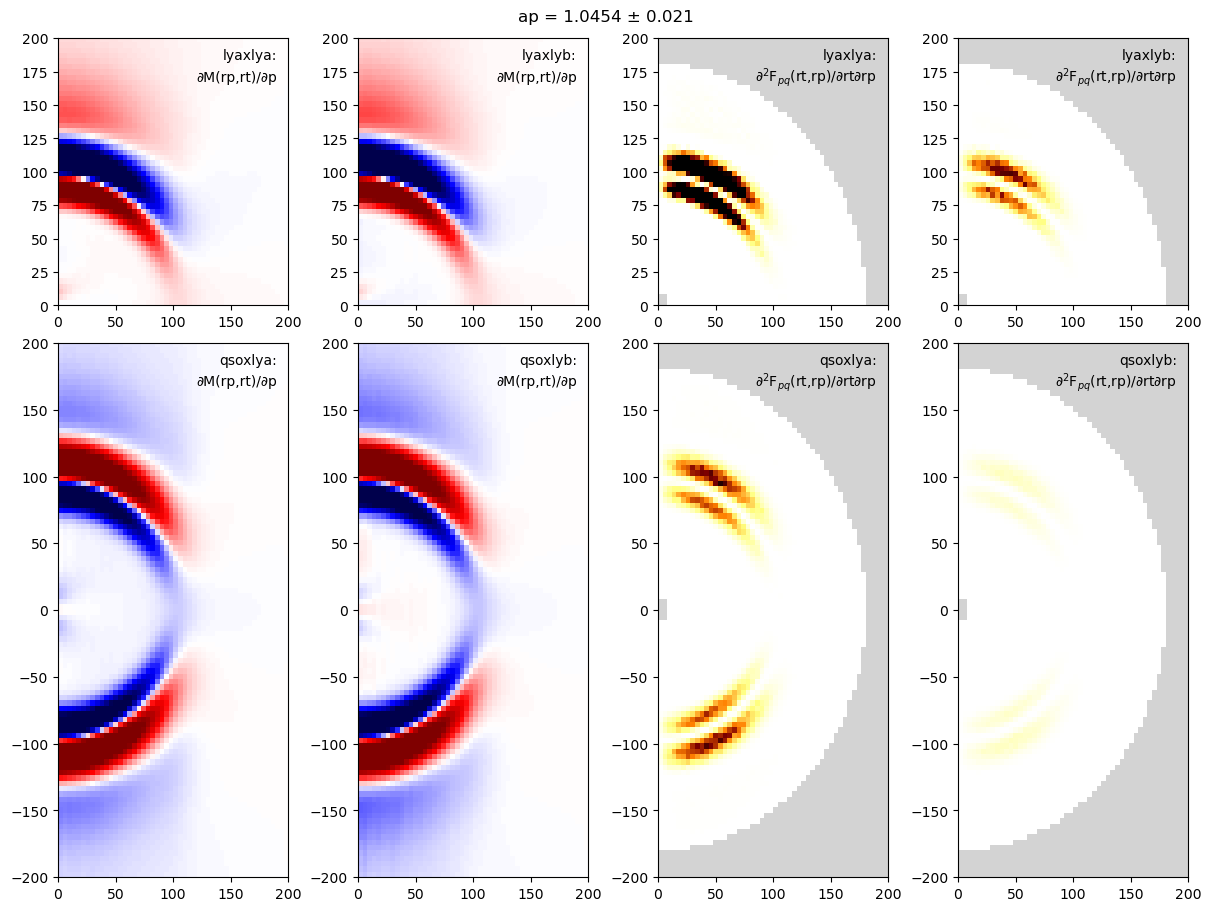

In [8]:
plotter.plot_sensitivity(vi.sensitivity, 'ap')

The left-hand four plots show the partial derivatives of the correlation function model $\xi(r_\perp,r_\parallel)$ with respect to $\alpha_p$ for each sample (lya x lya, lya x lyb, qso x lya, qso x lyb) using red to indicate regions of the $(r_\perp,r_\parallel)$ plane where the model increases and blue for decreases. The right-hand four plots show the corresponding distributions of Fisher information over the $(r_\perp,r_\parallel)$ plane, defined as:
$$
F_{pq}(r_\perp,r_\parallel) =
\frac{\partial \xi(r_\perp,r_\parallel)}{\partial p} \sum_{r_\perp',r_\parallel'}\,
\left[ C^{-1} \right]_{(r_\perp,r_\parallel),(r_\perp',r_\parallel')}
\frac{\partial \xi(r_\perp',r_\parallel')}{\partial q} \; ,
$$
so that the usual Fisher matrix element is just the summation over the the image
$$
F_{pq} = \sum_{r_\perp,r_\parallel} F_{pq}(r_\perp,r_\parallel) \; .
$$
Darker regions of this plot show the source of information on the floating parameters $p$ and $q$ in the $(r_\perp,r_\parallel)$ plane. The four plots use the same color scale, so the relative information from each sample can be assessed.

In this example, $p = q = \alpha_\parallel$. To study a covariance, use $p \ne q$, for example:

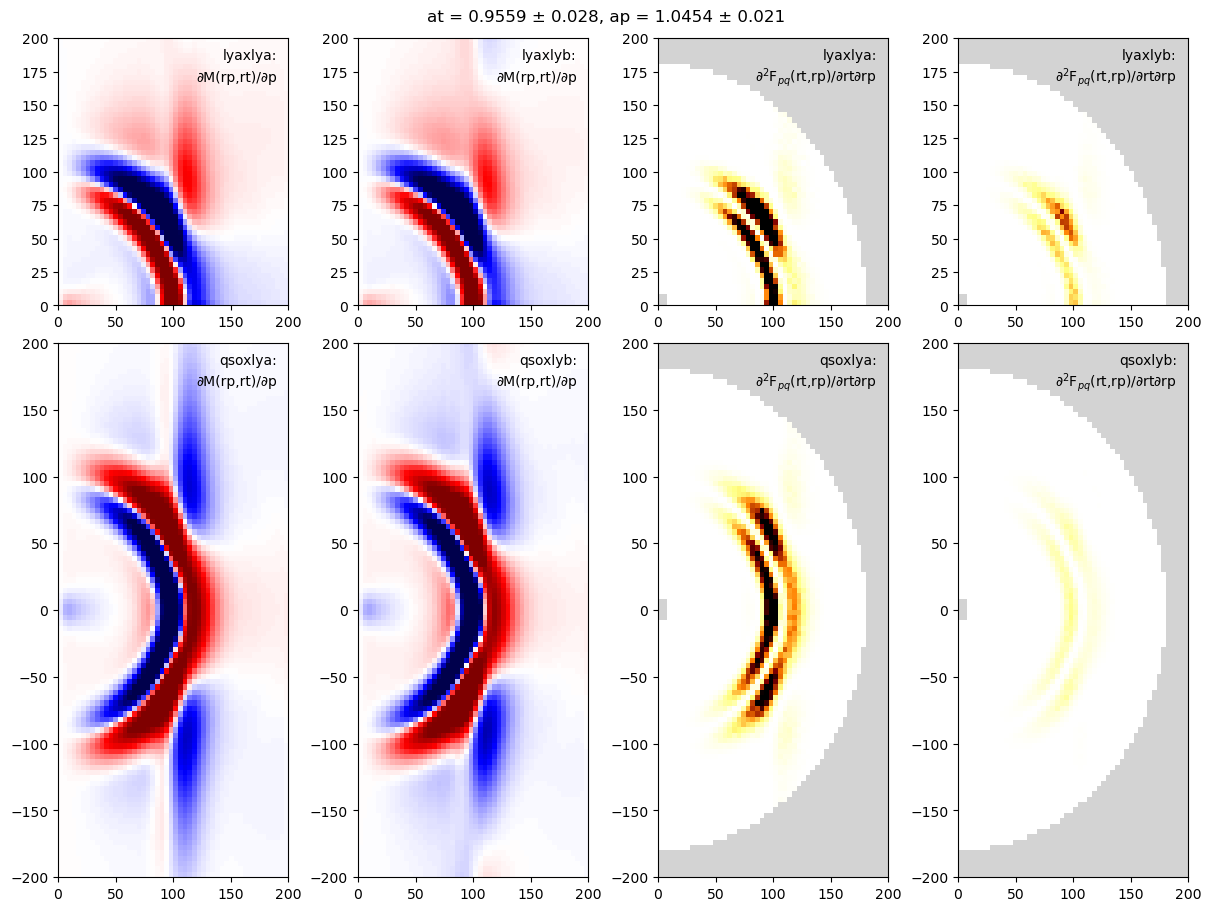

In [9]:
plotter.plot_sensitivity(vi.sensitivity, 'at', 'ap')

By default, the sensitivity plotted includes the distortion matrix correction,
$$
\xi_{dist}(r_\perp, r_\parallel) = D_{(r_\perp, r_\parallel), (r_\perp', r_\parallel')}\, \xi(r_\perp', r_\parallel') \; ,
$$
but you can disable this using:

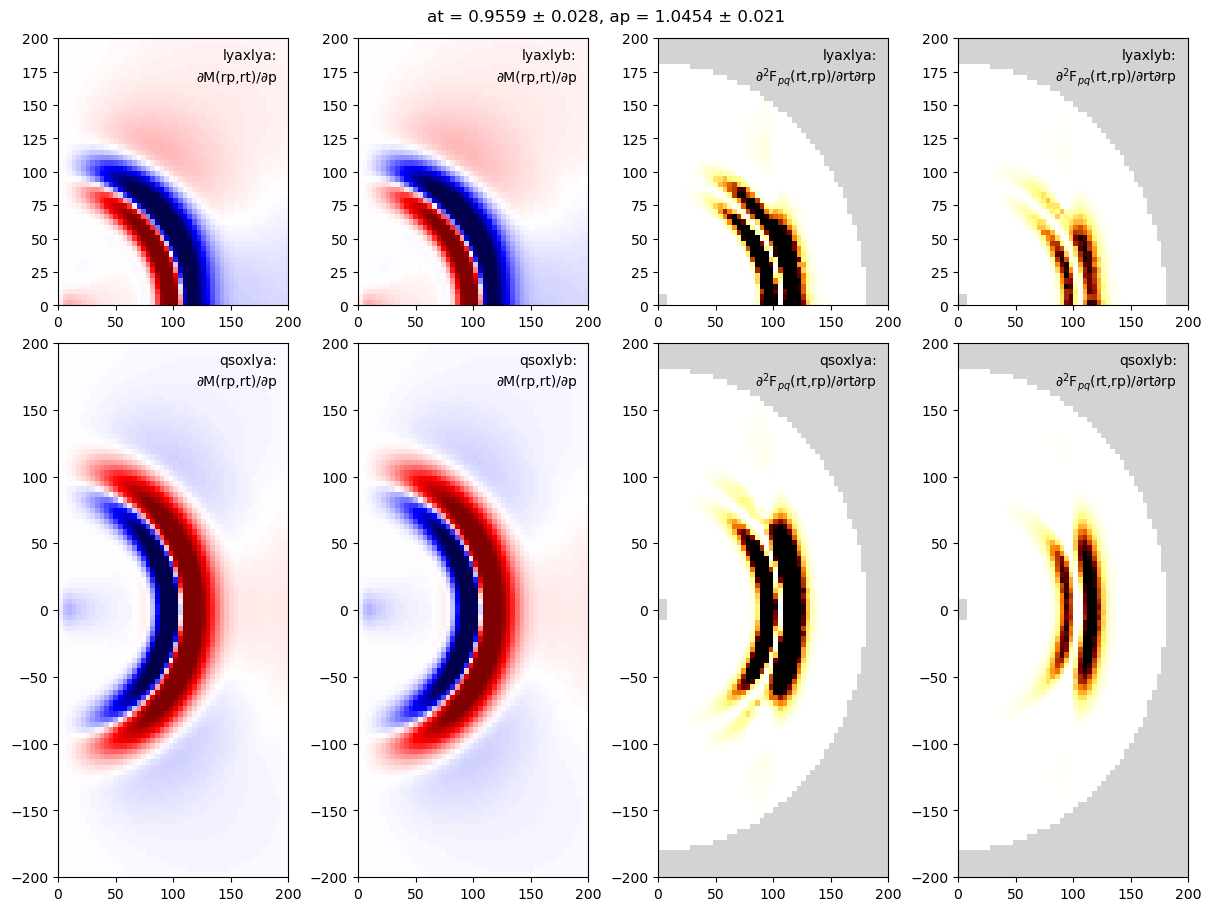

In [10]:
plotter.plot_sensitivity(vi.sensitivity, 'at', 'ap', distorted=False)

The correlation function model has separate peak and smooth components that are added to form the final model:
$$
\xi(r_\perp, r_\parallel) = \xi_{peak}(r_\perp, r_\parallel) + \xi_{smooth}(r_\perp, r_\parallel)
$$
Ideally, this decomposition isolates the contributions of the BAO wiggles to the peak component.

By default, the sensitivity plot combines both the peak and smooth components, but you can plot using just one component by specifying `comp = 'peak' / 'smooth'`, e.g.

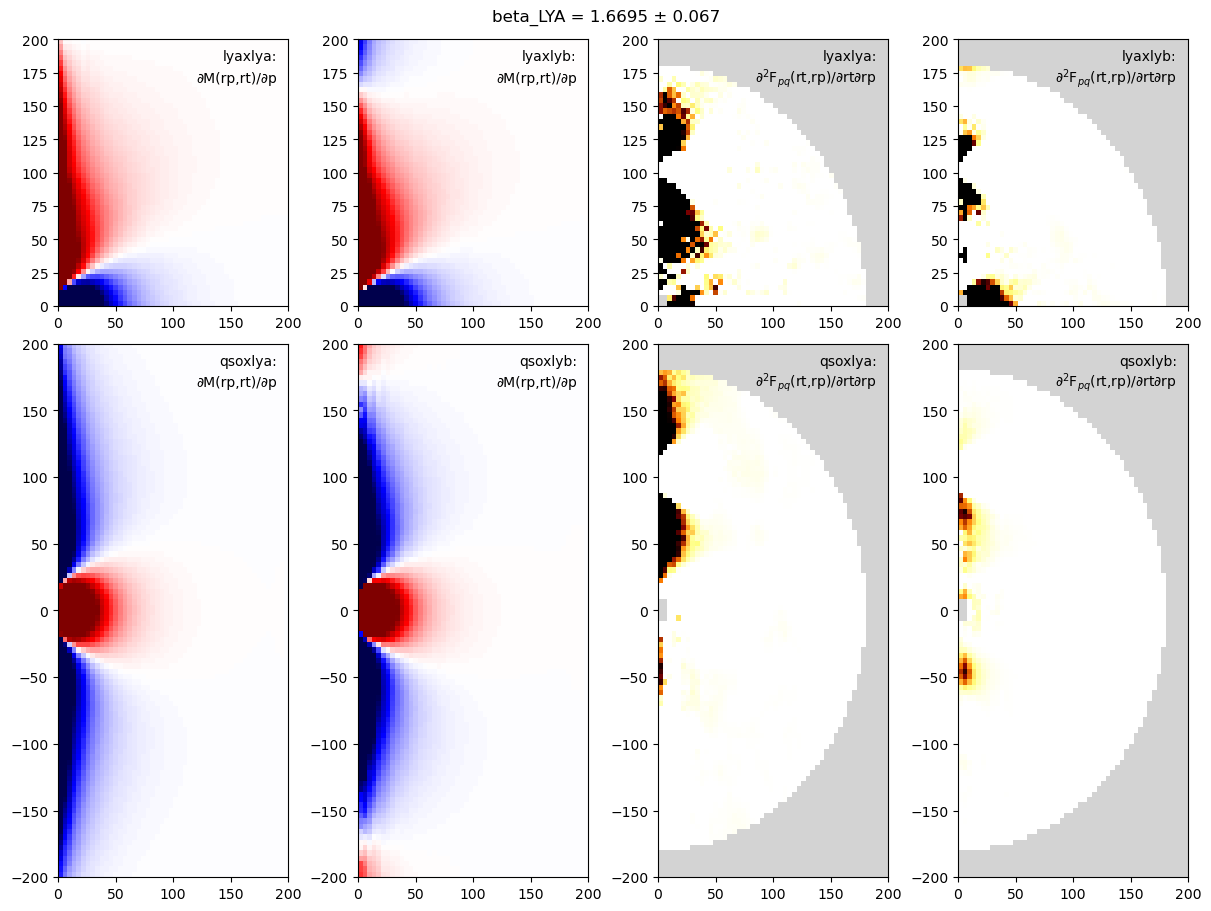

In [17]:
plotter.plot_sensitivity(vi.sensitivity, 'beta_LYA', comp='smooth')